<a href="https://colab.research.google.com/github/athadis/archana_INFO5502_Spring2022/blob/main/in_class_excercises/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

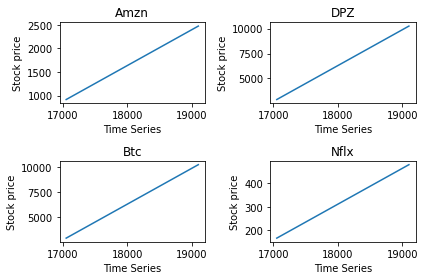

Amzn linear model score is  0.8711189934169932
DPZ linear model score is  0.9312098297726329
BTC linear model score is  0.4807490825794034
NFLX linear model score is  0.8127761232849322


In [22]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.linear_model import LinearRegression 

portfolio_df=pandas.read_csv("portfolio_data.csv")

portfolio_df.describe()

portfolio_df['TotalDays']=portfolio_df.apply(lambda row: (datetime.strptime(row['Date'],'%m/%d/%Y')-datetime(1970,1,1)).days, axis=1) # generating totalSeconds column to use for regression

test_df=pandas.DataFrame(columns=['Date','TotalDays'])
test_df['Date']=np.array(pandas.date_range(portfolio_df['Date'].max(),datetime.now()))
test_df['TotalDays']=test_df.apply(lambda row: (row['Date']-datetime(1970,1,1)).days, axis=1)

#using linear regression to fit models
x_train=portfolio_df[['TotalDays']]

amazon_model=LinearRegression()
dominos_model= LinearRegression()
btc_model = LinearRegression()
netflix_model= LinearRegression()

amazon_model.fit(x_train, portfolio_df[['AMZN']])
dominos_model.fit(x_train,portfolio_df[['DPZ']])
btc_model.fit(x_train,portfolio_df[['BTC']])
netflix_model.fit(x_train,portfolio_df[['NFLX']])

x_test=test_df[['TotalDays']]

#Plot 1
amzn_pred=amazon_model.predict(x_test)
plt.subplot(2,2,1)
plt.xlabel('Time Series')
plt.ylabel('Stock price')
plt.title('Amzn')
plt.plot(x_test,amzn_pred)

#Plot 2
dpz_pred=btc_model.predict(x_test)
plt.subplot(2,2,2)
plt.xlabel('Time Series')
plt.ylabel('Stock price')
plt.title('DPZ')
plt.plot(x_test,dpz_pred)

#Plot 3
btc_pred=btc_model.predict(x_test)
plt.subplot(2,2,3)
plt.xlabel('Time Series')
plt.ylabel('Stock price')
plt.title('Btc')
plt.plot(x_test,btc_pred)

#Plot 4
netflix_pred=netflix_model.predict(x_test)
plt.subplot(2,2,4)
plt.xlabel('Time Series')
plt.ylabel('Stock price')
plt.title('Nflx')
plt.plot(x_test,netflix_pred)

plt.tight_layout()
plt.show()

#calculating scores of the models
print('Amzn linear model score is ',amazon_model.score(x_train, portfolio_df[['AMZN']]))
print('DPZ linear model score is ', dominos_model.score(x_train,portfolio_df[['DPZ']]))
print('BTC linear model score is ',btc_model.score(x_train,portfolio_df[['BTC']]))
print('NFLX linear model score is ',netflix_model.score(x_train,portfolio_df[['NFLX']]))


### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [83]:
import pandas
import re
import nltk
import string
import re

from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split


nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stop_words=stopwords.words('english')

def process_tweet(tweet):
  result=str(tweet).lower()
  result=re.sub(r'@user','',result) #removing repetitive '@user' from tweets
  result = re.sub('\[.*?\]', '', result)
  result = re.sub('https?://\S+|www\.\S+', '', result)
  result = re.sub('<.*?>+#', '', result)
  result = re.sub('[%s]' % re.escape(string.punctuation), '', result)
  result = re.sub('\n', '', result)
  result = re.sub('\w*\d\w*', '', result)
  result = [word for word in result.split(' ') if word not in stop_words]
  result=" ".join(result)
  result = [stemmer.stem(word) for word in result.split(' ')]
  result=" ".join(result)
  return result

train_df=pandas.read_csv('train.csv')

train_df.describe()
train_df['tweet']=train_df['tweet'].apply(process_tweet)

model= LogisticRegression()

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(train_df['tweet'])

ytrain, yvalid = train_test_split(train_df['label'], random_state=42, test_size=0.3)

train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

model.fit(xtrain_tfidf, ytrain)

prediction = model.predict_proba(xvalid_tfidf)

# print('F1 score is ',f1_score(yvalid, prediction))

#---------------------
test_df=pandas.read_csv('test.csv')

test_df.describe()
test_df[['tweet']]=test_df[['tweet']].apply(process_tweet)







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
